In [1]:
import torch
import torchaudio

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio, display

In [2]:
def plot_waveform(waveform, sample_rate, s1_list=None, s2_list=None, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1, figsize=(20, 8))
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
    
    if s1_list is not None:
      for i in range(s1_list.shape[0]):
        start, end = s1_list[i]
        axes[c].axvspan(start, end, color='red', alpha=0.3)
    
    if s2_list is not None:
      for i in range(s2_list.shape[0]):
        start, end = s2_list[i]
        axes[c].axvspan(start, end, color='blue', alpha=0.3)      
    
  figure.suptitle(title)
  plt.show(block=False)
  
  
def plot_specgram(waveform, sample_rate, s1_list=None, s2_list=None, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1, figsize=(20, 8))
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    
    if s1_list is not None:
      for i in range(s1_list.shape[0]):
        start, end = s1_list[i]
        axes[c].axvspan(start, end, color='red', alpha=0.3)
    
    if s2_list is not None:
      for i in range(s2_list.shape[0]):
        start, end = s2_list[i]
        axes[c].axvspan(start, end, color='blue', alpha=0.3)
    
  figure.suptitle(title)
  plt.show(block=False)


def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [3]:
waveform, sample_rate = torchaudio.load('dataset/training_data/2530_AV.wav')

In [4]:
play_audio(waveform, sample_rate)

In [5]:
timetable = pd.read_csv('dataset/training_data/2530_AV.tsv', delimiter='\t', header=None)
timetable.head()

0         1  2
0  0.000000  0.242000  0
1  0.242000  0.400176  1
2  0.400176  0.497088  2
3  0.497088  0.620176  3
4  0.620176  0.780176  4

In [6]:
s1_ranges = timetable[timetable[2] == 1][[0,1]].to_numpy()
s2_ranges = timetable[timetable[2] == 3][[0,1]].to_numpy()

s1_ranges

array([[0.242   , 0.400176],
       [0.780176, 0.920176],
       [1.340176, 1.460176],
       [1.880176, 1.980176],
       [2.380176, 2.540176],
       [2.900176, 3.020176],
       [3.440176, 3.560176],
       [4.040176, 4.180176],
       [4.600176, 4.700176],
       [5.100176, 5.260176],
       [5.660176, 5.820176],
       [6.280176, 6.380176],
       [6.834382, 6.946309],
       [7.380176, 7.500176],
       [7.944103, 8.040176],
       [8.500176, 8.620176],
       [9.100176, 9.220176],
       [9.720176, 9.813882]])

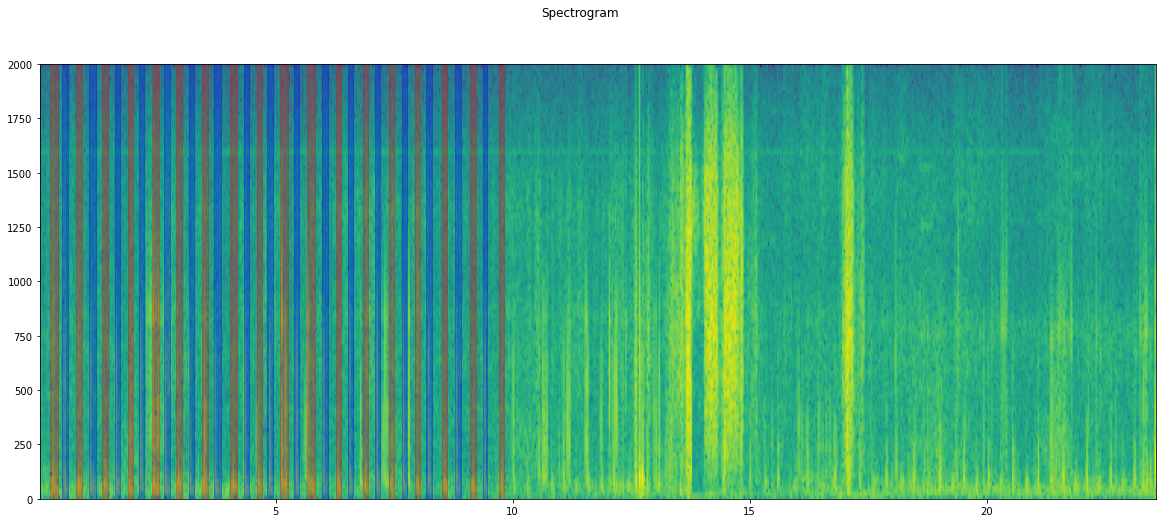

In [7]:
plot_specgram(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

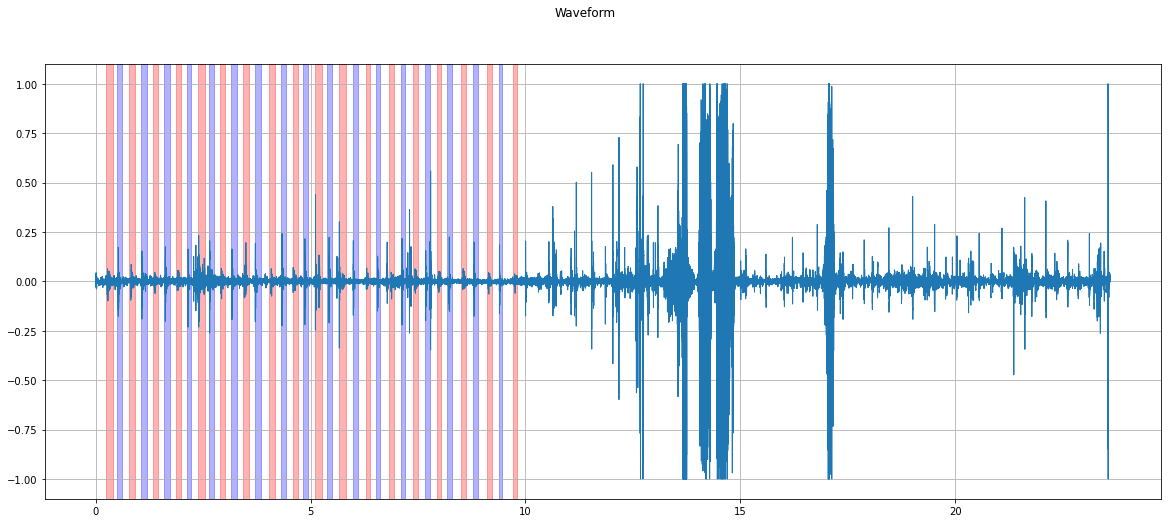

In [8]:
plot_waveform(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

In [9]:
waveform, sample_rate = torchaudio.load('dataset/training_data/2530_MV.wav')

In [10]:
play_audio(waveform, sample_rate)

In [11]:
timetable = pd.read_csv('dataset/training_data/2530_MV.tsv', delimiter='\t', header=None)
timetable.head()

0         1  2
0  0.000000  1.002750  0
1  1.002750  1.120238  1
2  1.120238  1.300238  2
3  1.300238  1.440238  3
4  1.440238  1.680238  4

In [12]:
s1_ranges = timetable[timetable[2] == 1][[0,1]].to_numpy()
s2_ranges = timetable[timetable[2] == 3][[0,1]].to_numpy()

s1_ranges

array([[ 1.00275 ,  1.120238],
       [ 1.680238,  1.780238],
       [ 2.660238,  2.760238],
       [ 3.05439 ,  3.180238],
       [ 3.740238,  3.900238],
       [ 4.380238,  4.480238],
       [ 4.920238,  5.020238],
       [ 5.434724,  5.560238],
       [ 5.980238,  6.080238],
       [ 6.520238,  6.620238],
       [ 7.040238,  7.160614],
       [ 7.540238,  7.660238],
       [ 8.040238,  8.140238],
       [ 8.540238,  8.640238],
       [ 9.080238,  9.180238],
       [ 9.640238,  9.760238],
       [10.220238, 10.340238],
       [10.720238, 10.840238],
       [11.260238, 11.360238],
       [11.800238, 11.920238],
       [12.400238, 12.500238],
       [13.000238, 13.120238],
       [13.551997, 13.690343],
       [14.080238, 14.200238],
       [14.600238, 14.720238],
       [15.117955, 15.240238],
       [15.660238, 15.760238],
       [16.200238, 16.320238],
       [16.734934, 16.860238],
       [17.256919, 17.360238],
       [17.760238, 17.880238],
       [18.276362, 18.380238],
       [

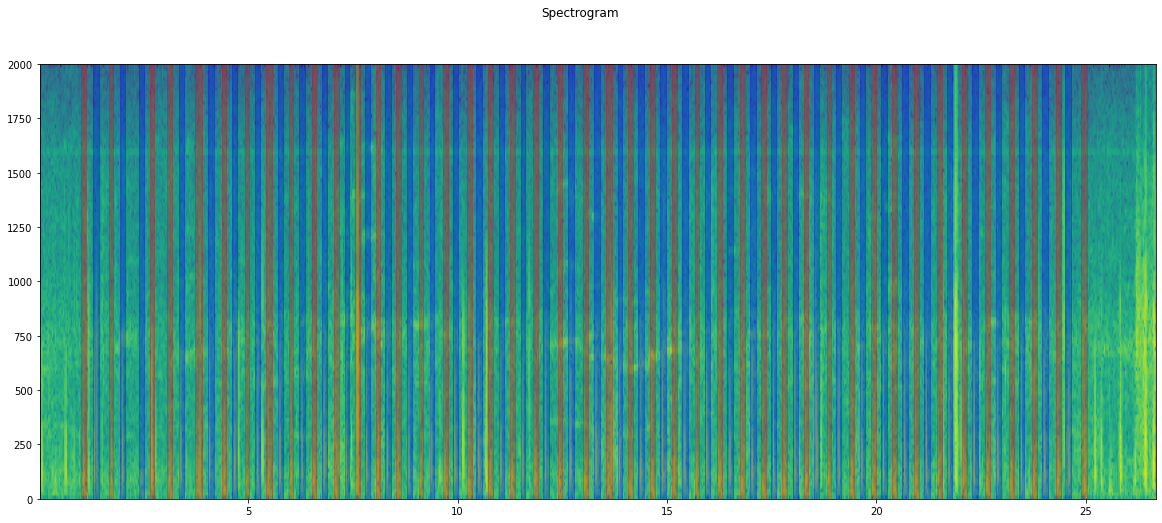

In [13]:
plot_specgram(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

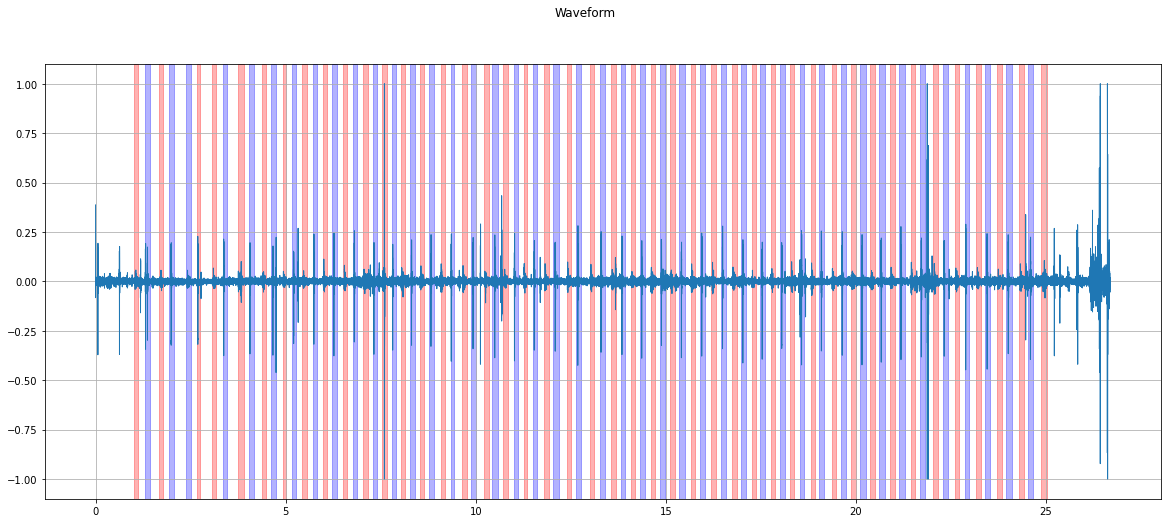

In [14]:
plot_waveform(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

In [15]:
waveform, sample_rate = torchaudio.load('dataset/training_data/50654_PV.wav')

In [16]:
play_audio(waveform, sample_rate)

In [18]:
#timetable = pd.read_csv(c, delimiter='\t', header=None)
#timetable.head()

In [19]:
s1_ranges = timetable[timetable[2] == 1][[0,1]].to_numpy()
s2_ranges = timetable[timetable[2] == 3][[0,1]].to_numpy()

s1_ranges

array([[ 1.00275 ,  1.120238],
       [ 1.680238,  1.780238],
       [ 2.660238,  2.760238],
       [ 3.05439 ,  3.180238],
       [ 3.740238,  3.900238],
       [ 4.380238,  4.480238],
       [ 4.920238,  5.020238],
       [ 5.434724,  5.560238],
       [ 5.980238,  6.080238],
       [ 6.520238,  6.620238],
       [ 7.040238,  7.160614],
       [ 7.540238,  7.660238],
       [ 8.040238,  8.140238],
       [ 8.540238,  8.640238],
       [ 9.080238,  9.180238],
       [ 9.640238,  9.760238],
       [10.220238, 10.340238],
       [10.720238, 10.840238],
       [11.260238, 11.360238],
       [11.800238, 11.920238],
       [12.400238, 12.500238],
       [13.000238, 13.120238],
       [13.551997, 13.690343],
       [14.080238, 14.200238],
       [14.600238, 14.720238],
       [15.117955, 15.240238],
       [15.660238, 15.760238],
       [16.200238, 16.320238],
       [16.734934, 16.860238],
       [17.256919, 17.360238],
       [17.760238, 17.880238],
       [18.276362, 18.380238],
       [

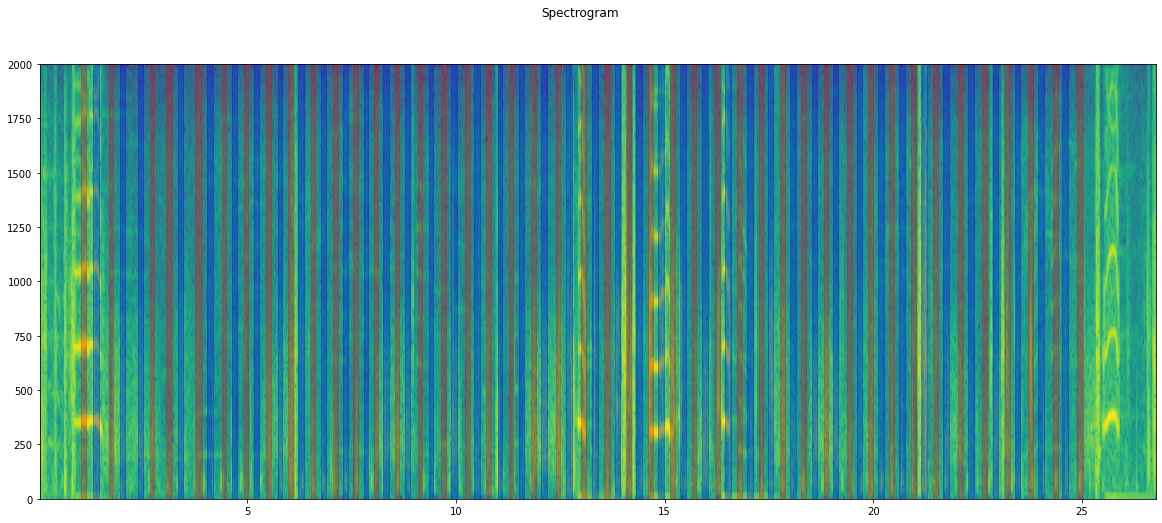

In [20]:
plot_specgram(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

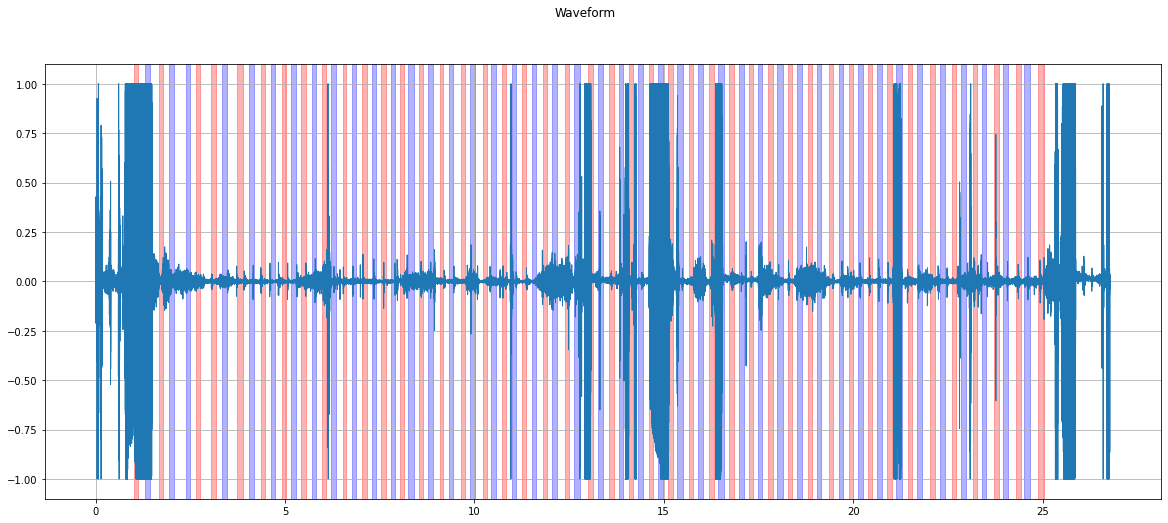

In [21]:
plot_waveform(waveform, sample_rate, s1_list=s1_ranges, s2_list=s2_ranges)

In [22]:
patients_df = pd.read_csv('dataset/data.csv')

patients_df.head()

Unnamed: 0     id    AV    PV    TV    MV    Phc    Age     Sex  Height  \
0           0  13918  True  True  True  True  False  Child    Male    98.0   
1           1  14241  True  True  True  True  False  Child    Male    87.0   
2           2  14998  True  True  True  True  False  Child    Male     NaN   
3           3  23625  True  True  True  True  False  Child  Female    92.0   
4           4  24160  True  True  True  True  False  Child  Female    98.0   

   ...  Systolic murmur pitch  Systolic murmur quality  \
0  ...                    Low                  Blowing   
1  ...                    Low                    Harsh   
2  ...                    NaN                      NaN   
3  ...                    NaN                      NaN   
4  ...                    NaN                      NaN   

  Diastolic murmur timing Diastolic murmur shape Diastolic murmur grading  \
0                     NaN                    NaN                      NaN   
1                     NaN                    NaN                      NaN   
2                     NaN                    NaN                      NaN   
3                     NaN                    NaN                      NaN   
4                     NaN                    NaN                      NaN   

  Diastolic murmur pitch Diastolic murmur quality   Outcome Campaign  \
0                    NaN                      NaN  Abnormal   CC2015   
1                    NaN                      NaN  Abnormal   CC2015   
2                    NaN                      NaN  Abnormal   CC2015   
3                    NaN                      NaN  Abnormal   CC2015   
4                    NaN                      NaN  Abnormal   CC2015   

  Additional ID  
0           NaN  
1           NaN  
2           NaN  
3       50379.0  
4           NaN  

[5 rows x 28 columns]

<AxesSubplot:>

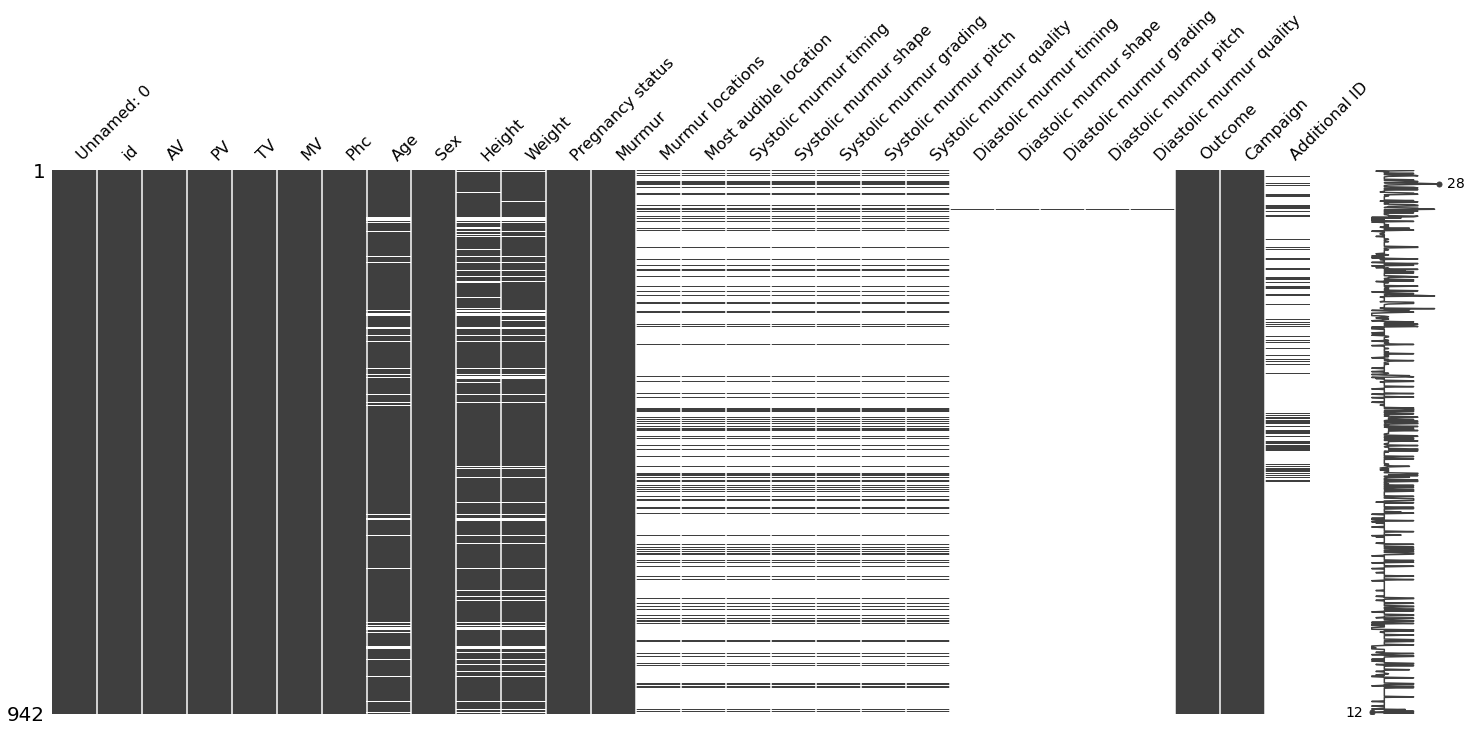

In [23]:
import missingno as msno

msno.matrix(patients_df)

In [24]:
patients_df.isna().sum()

Unnamed: 0                    0
id                            0
AV                            0
PV                            0
TV                            0
MV                            0
Phc                           0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

In [25]:
patients_df.groupby('Age').count()

Unnamed: 0   id   AV   PV   TV   MV  Phc  Sex  Height  Weight  \
Age                                                                         
Adolescent          72   72   72   72   72   72   72   72      66      66   
Child              664  664  664  664  664  664  664  664     641     645   
Infant             126  126  126  126  126  126  126  126     109     116   
Neonate              6    6    6    6    6    6    6    6       6       6   

            ...  Systolic murmur pitch  Systolic murmur quality  \
Age         ...                                                   
Adolescent  ...                     16                       16   
Child       ...                    131                      131   
Infant      ...                     25                       25   
Neonate     ...                      1                        1   

            Diastolic murmur timing  Diastolic murmur shape  \
Age                                                           
Adolescent                        3                       3   
Child                             1                       1   
Infant                            1                       1   
Neonate                           0                       0   

            Diastolic murmur grading  Diastolic murmur pitch  \
Age                                                            
Adolescent                         3                       3   
Child                              1                       1   
Infant                             1                       1   
Neonate                            0                       0   

            Diastolic murmur quality  Outcome  Campaign  Additional ID  
Age                                                                     
Adolescent                         3       72        72             13  
Child                              1      664       664            116  
Infant                             1      126       126             11  
Neonate                            0        6         6              0  

[4 rows x 27 columns]

In [26]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                942 non-null    int64  
 1   id                        942 non-null    int64  
 2   AV                        942 non-null    bool   
 3   PV                        942 non-null    bool   
 4   TV                        942 non-null    bool   
 5   MV                        942 non-null    bool   
 6   Phc                       942 non-null    bool   
 7   Age                       868 non-null    object 
 8   Sex                       942 non-null    object 
 9   Height                    826 non-null    float64
 10  Weight                    837 non-null    float64
 11  Pregnancy status          942 non-null    bool   
 12  Murmur                    942 non-null    object 
 13  Murmur locations          179 non-null    object 
 14  Most audib

In [27]:
import os

def plot_waveforms(wav_list, title="waveform", xlim=None, ylim=None):
  figure, axes = plt.subplots(len(wav_list), 1, figsize=(20, 5 * len(wav_list)))
  
  if len(wav_list) == 1:
    axes = [axes]
  for c, wav in enumerate(wav_list):
    wav_path = os.path.abspath(f'./dataset/training_data/{wav}.wav')
    tsv_path = os.path.abspath(f'./dataset/training_data/{wav}.tsv')
    
    waveform, sample_rate = torchaudio.load(wav_path)
    waveform = waveform.numpy()
  
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
  
    axes[c].plot(time_axis, waveform[0], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'{wav_path}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
        
    timetable = pd.read_csv(tsv_path, delimiter='\t', header=None)
    s1_ranges = timetable[timetable[2] == 1][[0,1]].to_numpy()
    s2_ranges = timetable[timetable[2] == 3][[0,1]].to_numpy()
        
    if s1_ranges is not None:
      for i in range(s1_ranges.shape[0]):
        start, end = s1_ranges[i]
        axes[c].axvspan(start, end, color='red', alpha=0.3)
    
    if s2_ranges is not None:
      for i in range(s2_ranges.shape[0]):
        start, end = s2_ranges[i]
        axes[c].axvspan(start, end, color='blue', alpha=0.3)
      
    figure.suptitle(title)
  plt.tight_layout()
  plt.show(block=False)
  
  
def plot_specgrams(wav_list, title="Spectrogram", xlim=None):
  figure, axes = plt.subplots(len(wav_list), 1, figsize=(20, 5 * len(wav_list)))
  
  if len(wav_list) == 1:
    axes = [axes]
  for c, wav in enumerate(wav_list):
    wav_path = os.path.abspath(f'./dataset/training_data/{wav}.wav')
    tsv_path = os.path.abspath(f'./dataset/training_data/{wav}.tsv')
  
    waveform, sample_rate = torchaudio.load(wav_path)
    waveform = waveform.numpy()
  
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
  
    axes[c].specgram(waveform[0], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'{wav_path}')
    if xlim:
      axes[c].set_xlim(xlim)
        
    timetable = pd.read_csv(tsv_path, delimiter='\t', header=None)
    s1_ranges = timetable[timetable[2] == 1][[0,1]].to_numpy()
    s2_ranges = timetable[timetable[2] == 3][[0,1]].to_numpy()
    
    if s1_ranges is not None:
      for i in range(s1_ranges.shape[0]):
        start, end = s1_ranges[i]
        axes[c].axvspan(start, end, color='red', alpha=0.3)
    
    if s2_ranges is not None:
      for i in range(s2_ranges.shape[0]):
        start, end = s2_ranges[i]
        axes[c].axvspan(start, end, color='blue', alpha=0.3)
      
    figure.suptitle(title)
  plt.tight_layout()
  plt.show(block=False)

In [28]:
patients_df[patients_df['Age'] == 'Neonate']['id'].iloc[:5].to_list()

[50636, 84731, 84732, 84784, 84804]

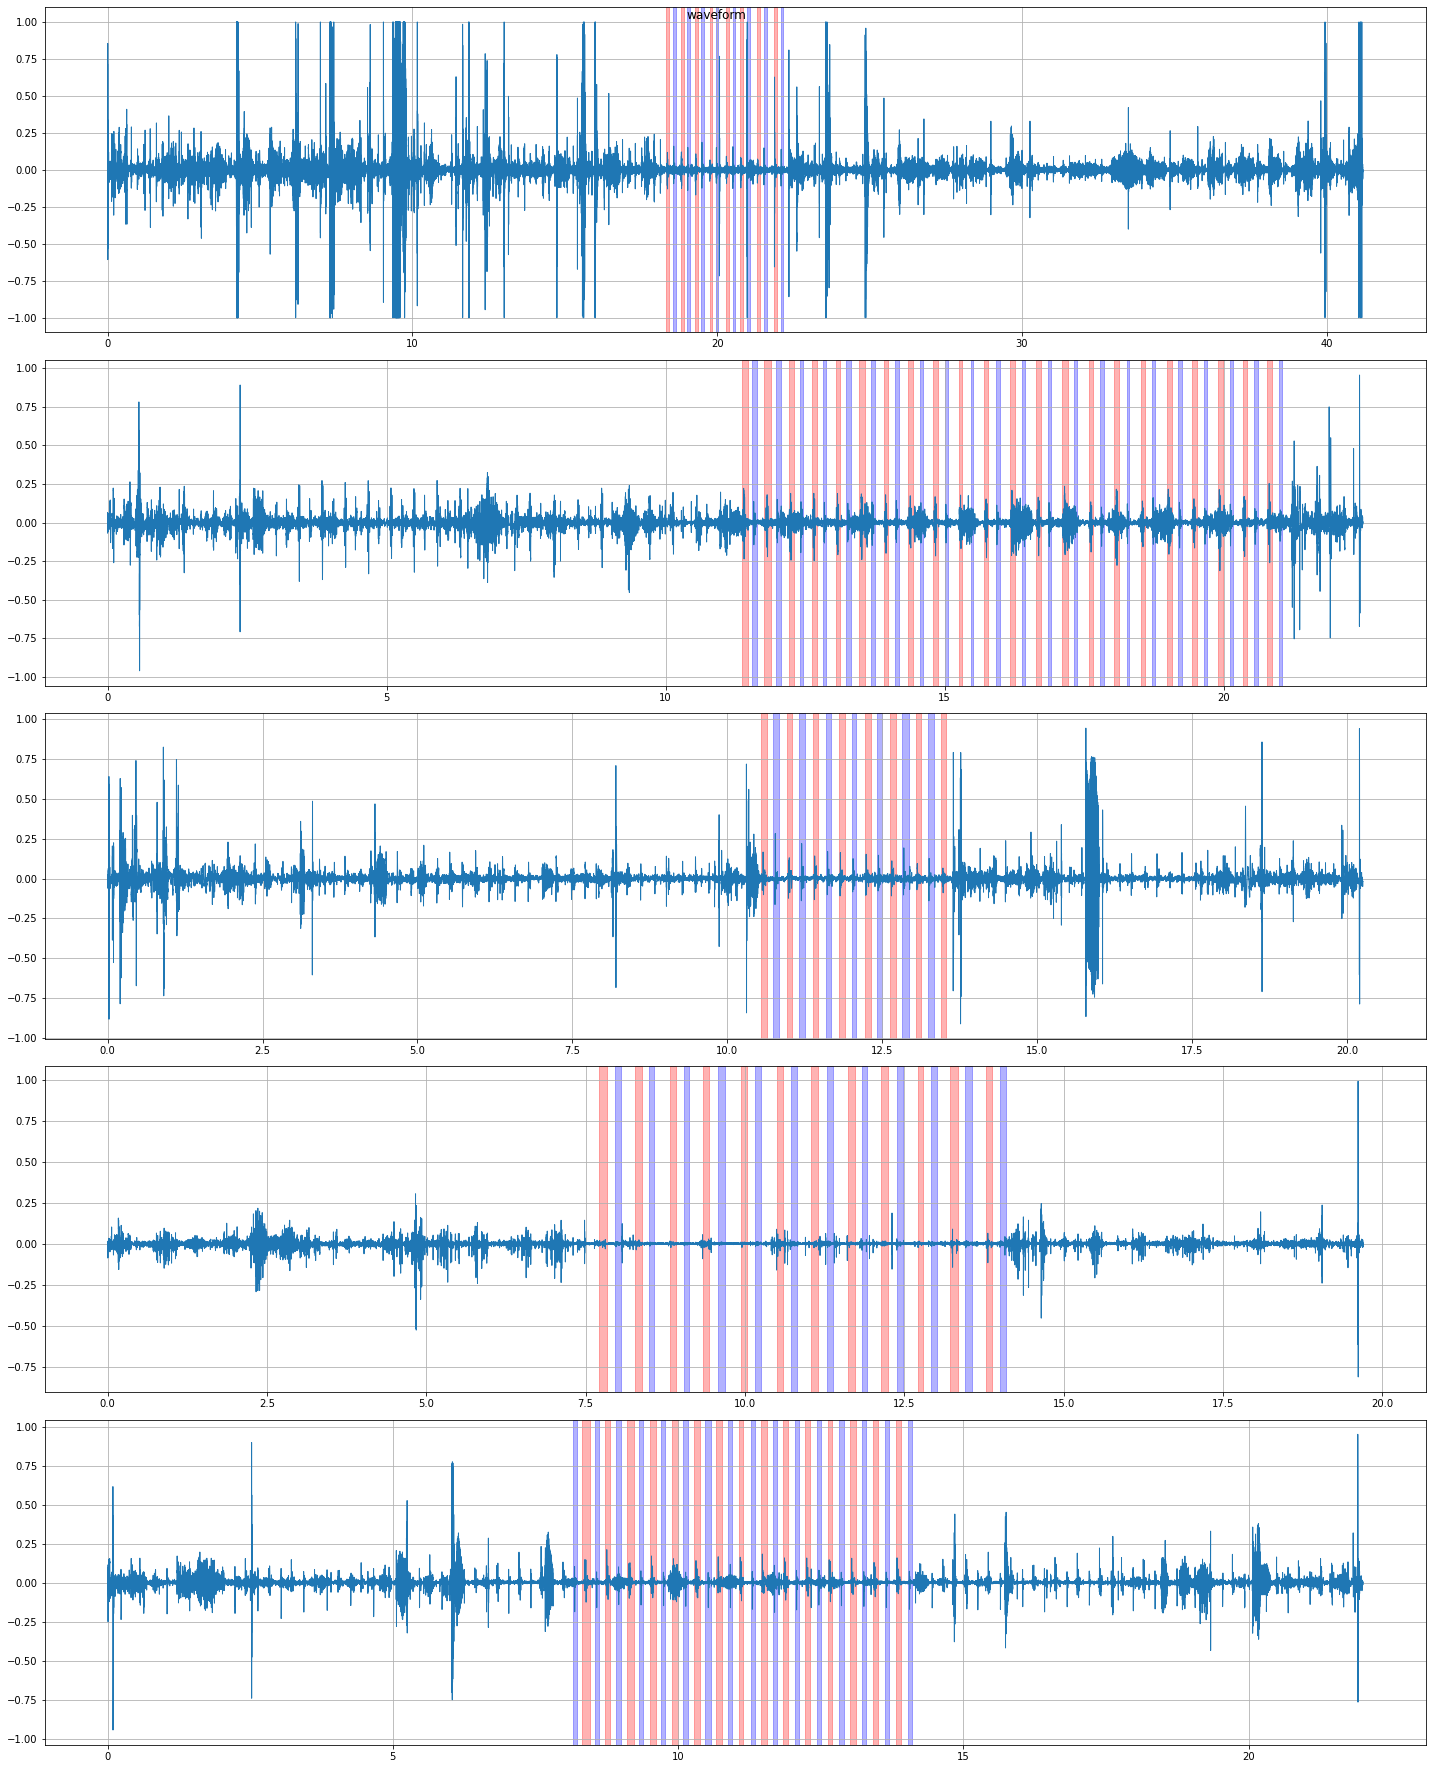

In [29]:
plot_waveforms(['50636_AV', '84731_MV', '84732_AV', '84784_AV', '84804_MV'])

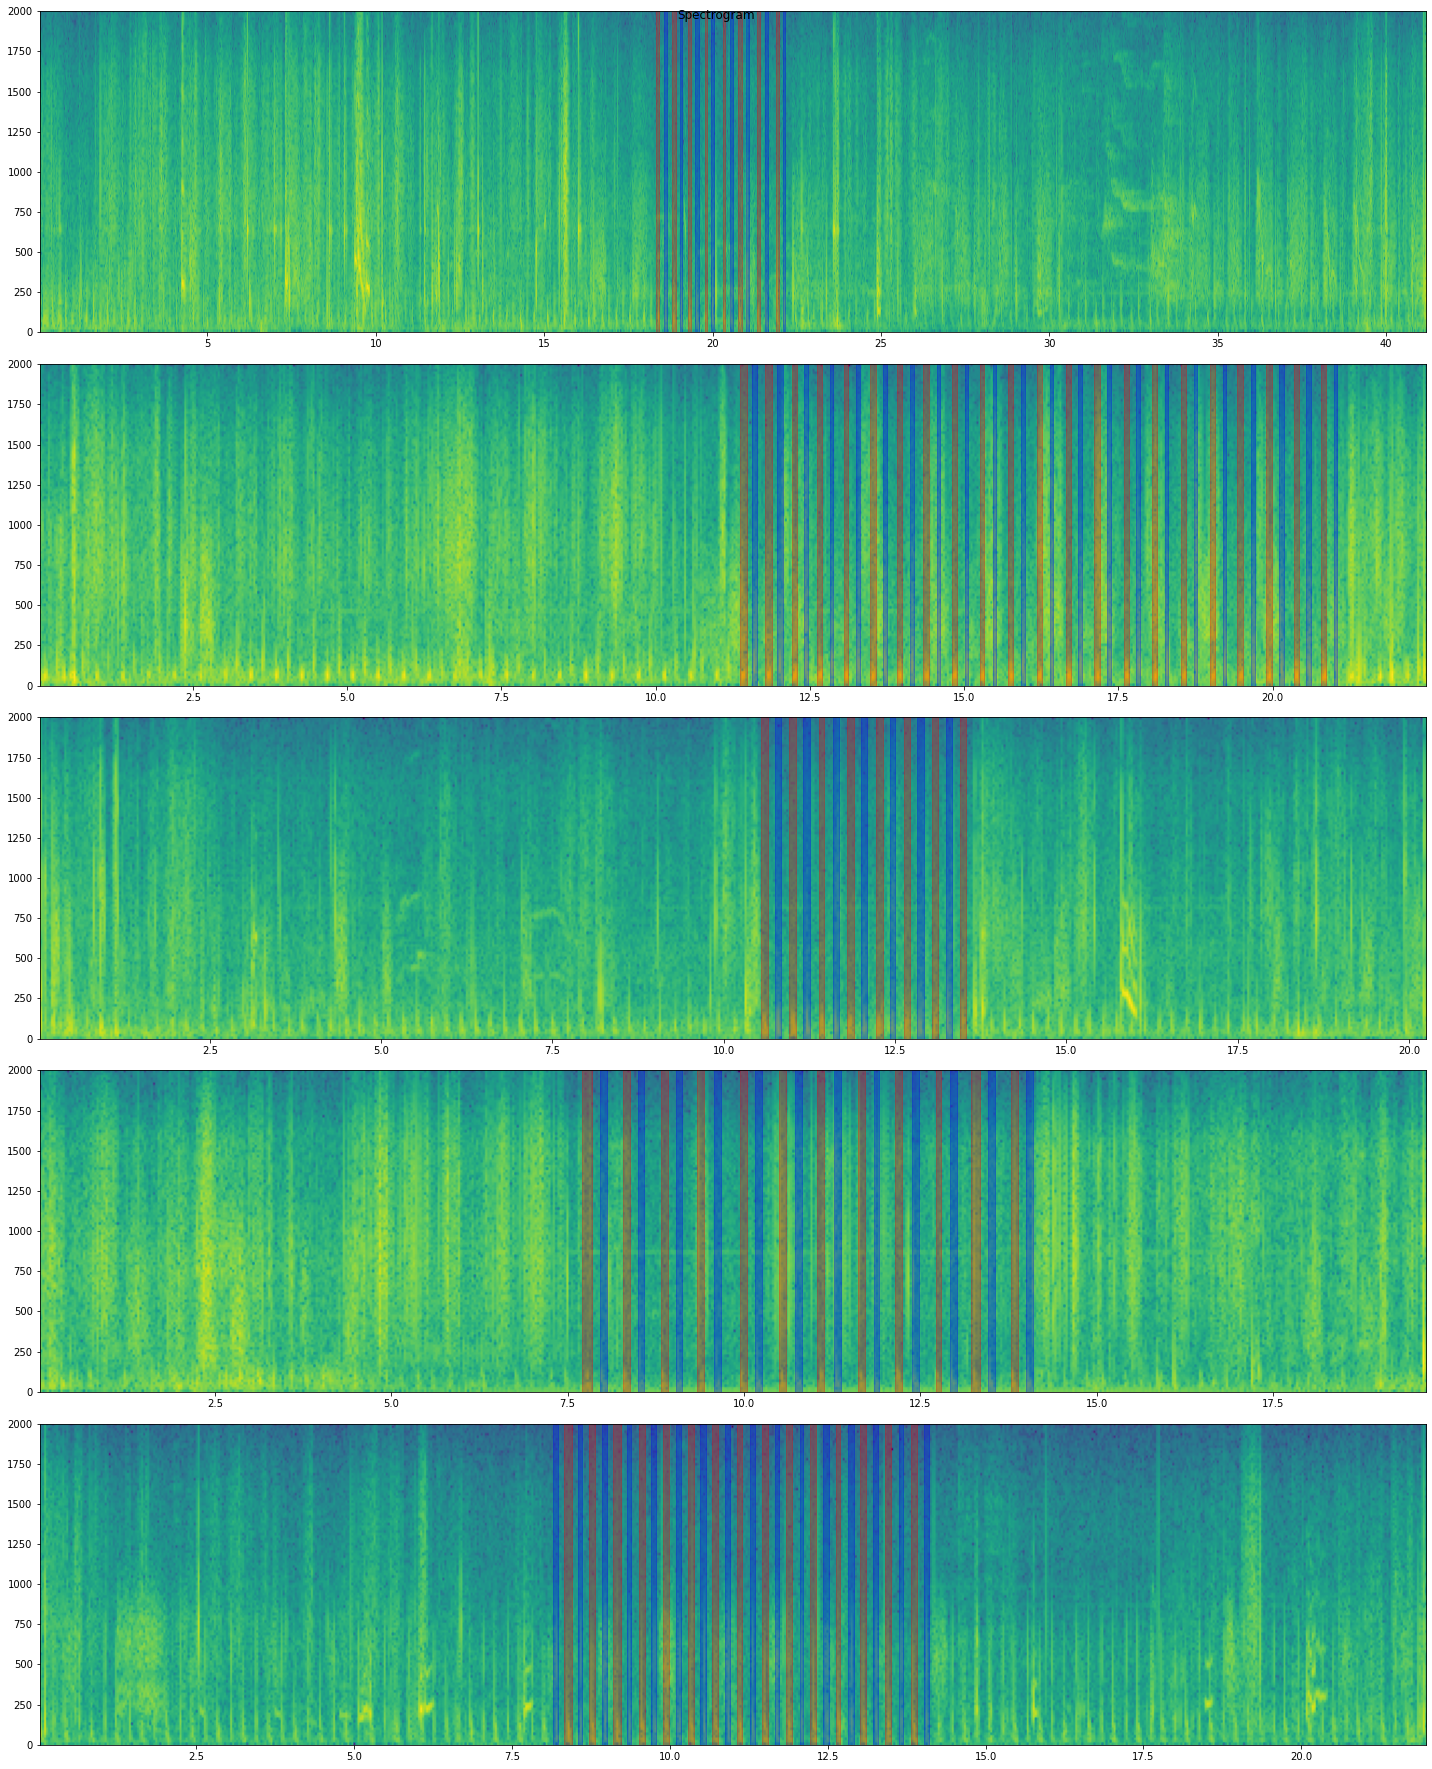

In [30]:
plot_specgrams(['50636_AV', '84731_MV', '84732_AV', '84784_AV', '84804_MV'])

In [33]:
import librosa

spectro = librosa.stft(waveform.numpy()[0])

In [34]:
spectro.shape

(1025, 210)

In [35]:
import numpy as np

np.abs(spectro)

array([[9.89449406e+00, 7.07541180e+00, 3.50144124e+00, ...,
        1.14736357e+01, 9.40342712e+00, 7.45803022e+00],
       [6.43743467e+00, 4.46639347e+00, 1.38766515e+00, ...,
        6.03092813e+00, 5.15995121e+00, 2.85392189e+00],
       [7.60774314e-01, 2.20244932e+00, 6.64695680e-01, ...,
        7.35217273e-01, 1.12302983e+00, 3.09708929e+00],
       ...,
       [1.19747676e-01, 9.94459167e-02, 6.59160241e-02, ...,
        1.08885929e-01, 5.02537370e-01, 2.27630720e-01],
       [1.10435270e-01, 8.49556774e-02, 1.03013227e-02, ...,
        1.08036995e-01, 3.90161872e-01, 7.13887751e-01],
       [6.10355809e-02, 6.75247982e-03, 7.21671507e-02, ...,
        1.04650244e-01, 1.94181561e-01, 8.02806914e-01]], dtype=float32)

In [36]:
spectro_mag = np.abs(spectro)
print(spectro_mag.min())
print(spectro_mag.max())
print(spectro_mag.mean())
print(spectro_mag.std())

4.494871e-06
336.5939
1.390952
5.5813923


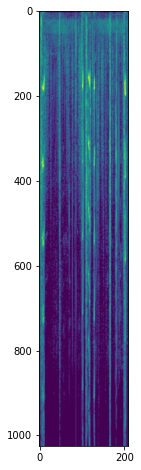

In [37]:
_, ax = plt.subplots(figsize=(20, 8))
ax.imshow(librosa.amplitude_to_db(np.abs(spectro)).reshape(1025, 210))

In [38]:
spectro_phase = np.angle(spectro)
print(spectro_phase.min())
print(spectro_phase.max())
print(spectro_phase.mean())
print(spectro_phase.std())

-3.1415927
3.1415927
0.001712521
1.8168306


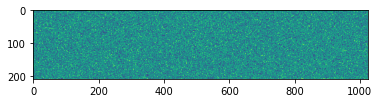

In [39]:
plt.imshow(spectro_phase.reshape(210, 1025))

In [41]:
mel_spectro = librosa.feature.melspectrogram(y=waveform.numpy()[0], sr=sample_rate)
mel_spectro.shape

(128, 210)

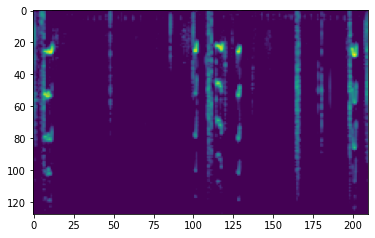

In [42]:
plt.imshow(librosa.amplitude_to_db(mel_spectro).reshape(128, 210))

In [43]:
librosa.display.specshow(spectro[0], sr=sample_rate, x_axis='time', y_axis='linear')

AttributeError: module 'librosa' has no attribute 'display'

In [44]:
display(Audio(waveform, rate=sample_rate))

In [48]:
librosa.display.specshow(librosa.amplitude_to_db(spectro_mag[0]), sr=sample_rate, x_axis='time', y_axis='linear')

AttributeError: module 'librosa' has no attribute 'display'

In [46]:
librosa.amplitude_to_db(spectro_mag[0]).shape

(210,)

In [47]:
waveform, sample_rate = torchaudio.load('dataset/training_data/2530_MV.wav')

display(Audio(waveform, rate=sample_rate))

In [49]:
!pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.12.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.4.0
appdirs                       1.4.4
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
attrs                         21.2.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         21.12b0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
chardet                       3.0.4
charset-normalizer            2.0.8
clang 